# Lab Instructions

You are part of a data team for a financial institution that uses an AI model to determine who will and will not be granted a loan.  Recently, there have been complaints from customers that the model unfairly discriminates based on the applicant's age and sex. A court has ordered that the financial institution must provide information about how the model works.  

Data from recent loan applications is given in `loan_data.csv`.  The data dictionary is below:

| Feature              | Description | Data Type |
| :---------------- | :------: | ----: |
|person_age|Age of the person|Float
|person_gender|Gender of the person|Categorical
|person_education|Highest education level|Categorical
|person_income|Annual income|Float
|person_emp_exp|Years of employment experience|Integer
|person_home_ownership|Home ownership status (e.g., rent, own, mortgage)|Categorical
|loan_amnt|Loan amount requested|Float
|loan_intent|Purpose of the loan|Categorical
|loan_int_rate|Loan interest rate|Float
|loan_percent_income|Loan amount as a percentage of annual income|Float
|cb_person_cred_hist_length|Length of credit history in years|Float
|credit_score|Credit score of the person|Integer
|previous_loan_defaults_on_file|Indicator of previous loan defaults|Categorical
|loan_status (target variable)|Loan approval status: 1 = approved; 0 = rejected|Integer

Visualize the relationship between age, sex and 5 other features with `loan_status`.  Which features seem to drive the model's decision to grant a loan?  Which seem unrelated?  Should the financial institution be concerned about potential legal trouble?  Make sure to justify your answers with specific references to your visualizations.



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sne

df = pd.read_csv('loan_data.csv')

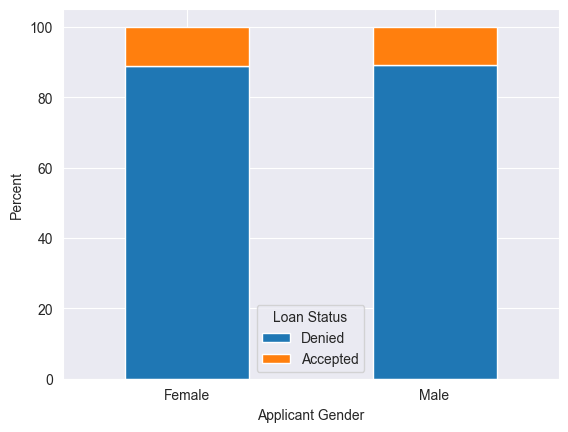

In [4]:
genderstatus_crosstab = pd.crosstab(df['person_gender'], df['loan_status'], normalize='index') * 100

ax = genderstatus_crosstab.plot(kind='bar', stacked=True, xlabel="Applicant Gender", ylabel='Percent')

plt.xticks(ticks=[0,1], labels = ['Female', 'Male'], rotation=0)

plt.legend(['Denied', 'Accepted'], title="Loan Status")

plt.show()

Comparing how gender relates to application acceptance, I can discern no difference visually. It seems there is no relation between gender and loan acceptance; in other words, this is fair.

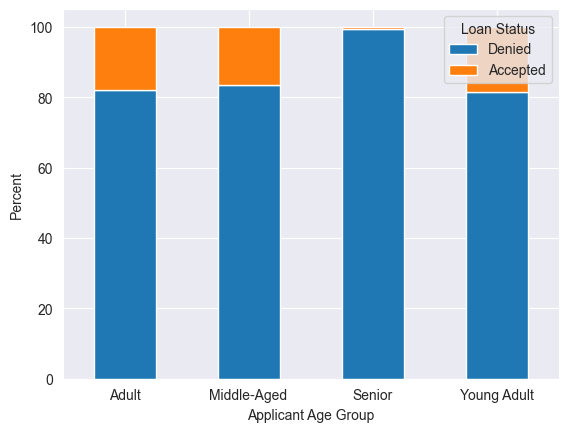

In [5]:
# Some interesting notes, age is a float, yet only represented by integers
# There is no loan applicant below the age of 20
df.loc[df['person_age'] >= 60, 'AgeGroup'] = 'Senior'
df.loc[df['person_age'] <= 59, 'AgeGroup'] = 'MiddleAge'
df.loc[df['person_age'] <= 44, 'AgeGroup'] = 'Adult'
df.loc[df['person_age'] <= 25, 'AgeGroup'] = 'YoungAdult'

agegroup_status_crosstab = pd.crosstab(df['AgeGroup'], df['loan_status'], normalize="index") * 100
agegroup_status_crosstab.plot(kind='bar', stacked=True, xlabel='Applicant Age Group', ylabel='Percent')

plt.xticks(ticks=[0,1,3,2], labels = ['Adult', 'Middle-Aged', 'Young Adult',  'Senior'], rotation=0)

plt.legend(['Denied', 'Accepted'], title="Loan Status")

plt.show()

There is very obvious discrimination here for Seniors. This is unacceptable under federal law.

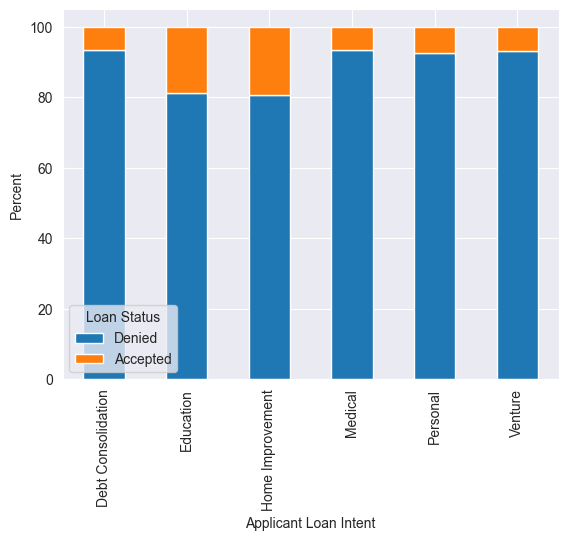

In [6]:
intent_status_crosstab = pd.crosstab(df['loan_intent'], df['loan_status'], normalize="index") * 100
intent_status_crosstab.plot(kind='bar', stacked=True, xlabel='Applicant Loan Intent', ylabel='Percent')

plt.xticks(ticks=[0,1,2,3,4,5], labels = ['Debt Consolidation', 'Education', 'Home Improvement',  'Medical', 'Personal', 'Venture'])

plt.legend(['Denied', 'Accepted'], title="Loan Status")

plt.show()

Among the debt consolidation, medical, personal, and venture categories, there is not much discernible difference, but it seems that loans are far more likely to be approved for home improvement and education in near equal measure.
There is clear bias in this process.

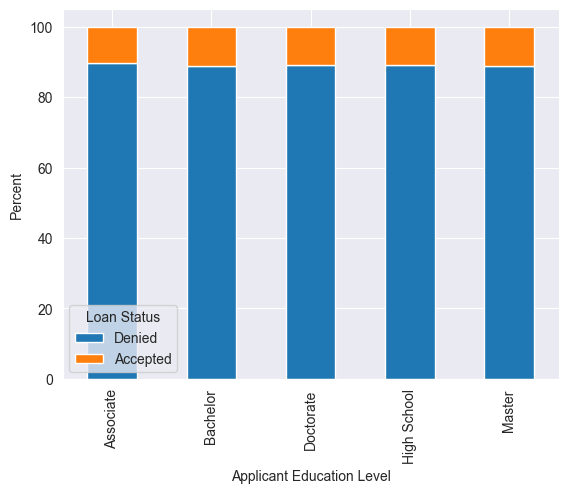

In [7]:
education_status_crosstab = pd.crosstab(df['person_education'], df['loan_status'], normalize="index") * 100
education_status_crosstab.plot(kind='bar', stacked=True, xlabel='Applicant Education Level', ylabel='Percent')

plt.legend(['Denied', 'Accepted'], title="Loan Status")

plt.show()

Surprisingly there seems to be no discrimination based on education level.

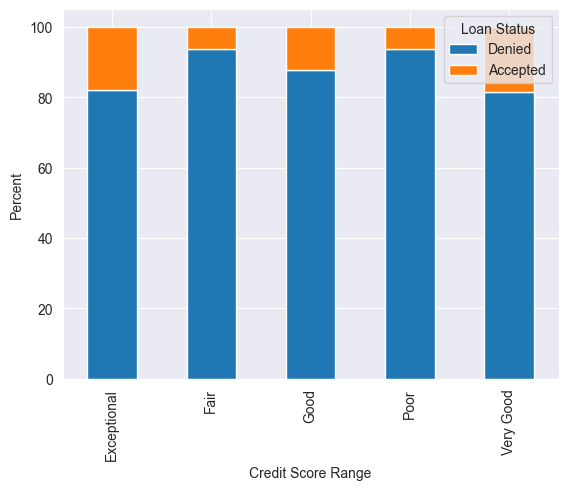

In [12]:
# According to American Express
df.loc[df['credit_score'] != 0, 'CreditRange']     = 'Exceptional'
df.loc[df['credit_score'] <= 799, 'CreditRange']   = 'Very Good'
df.loc[df['credit_score'] <= 739, 'CreditRange']   = 'Good'
df.loc[df['credit_score'] <= 669, 'CreditRange']   = 'Fair'
df.loc[df['credit_score'] <= 579, 'CreditRange']   = 'Poor'

creditscore_status_crosstab = pd.crosstab(df['CreditRange'], df['loan_status'], normalize="index") * 100
creditscore_status_crosstab.plot(kind='bar', stacked=True, xlabel='Credit Score Range', ylabel='Percent')

#plt.xticks(ticks=[0,1,3,2], labels = ['Adult', 'Middle-Aged', 'Young Adult',  'Senior'], rotation=0)

plt.legend(['Denied', 'Accepted'], title="Loan Status")

plt.show()


As expected, there is a strong relationship between credit score and loan approval.

My findings show that the bank strongly weighs credit score ranges, loan intent, and age in its decisions to approve or deny loans. They show that education and sex have no relation with the bank's decision to approve or deny loans. My findings that seniors are unfairly discriminated against point to a morally corrupt bank in violation of federal law.
